# Time series Forecasting : ARIMA model

> This notebook is followed by Time series Analysis (ARIMA) articles of [machinelearningplus](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/) and [timeseriesplus](https://datascienceplus.com/time-series-analysis-using-arima-model-in-r/#:~:text=Assumptions%20of%20ARIMA%20model&text=A%20white%20noise%20series%20and,regression%20with%20the%20past%20values.)

__ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.__


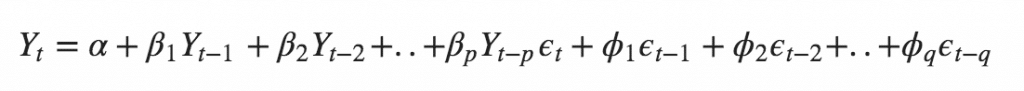

__ARIMA model in words which are characterized by 3 terms: p, d, q:__

__Predicted Yt = Constant + Linear combination Lags (Past-period) of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)__

- __p order terms : Auto Regressive (AR) terms refer to the lags (past-periods) of the differenced series,__

- __q order terms : Moving Average (MA) terms refer to the lags (past-periods) of errors and__

- __d order terms : I is the number of difference used to make the time series stationary.__


### Why ARIMA model?

That is __because the model provides with reliable-guiding history in making decisions related to supply chains__. ARIMA models can also be used __to predict the future price of your stocks based on the past prices.__

However, __the con of ARIMA model is that ARIMA requires a long historical horizon__, especially for seasonal products. __Using three years of historical demand is likely not to be enough. Short Life-Cycle Products. Products with a short life-cycle won't benefit from this much data.__


### When we use ARIMA model?

__ARIMA models are applied in some cases when data shows the evidence of non-stationarity in the sense of mean (but not variance/autocovariance)__, where 

- an __initial differencing step__ (corresponding to the "integrated" part of the model) can be __applied one or more times to eliminate the non-stationarity of the mean function.__

## Assumptions of ARIMA model

__1. Data should be (weakly) stationary – by stationary it means that the properties of the series doesn’t depend on the time__ when it is captured. A white noise series and series with cyclic behavior can also be considered as stationary series.


__2. Data should be univariate – ARIMA works on a single variable.__ Auto-regression is all about regression with the past values.


### To achieve stationarity:

- __difference the data – compute the differences between consecutive observations__


- __log or square root the series data - to stabilize non-constant variance__


- __if the data contains a trend, fit some type of curve to the data and then model the residuals from that fit__


- __Unit root test – This test is used to find out that first difference or regression which should be used on the trending data to make it stationary. In Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, small p-values suggest differencing is required.__

### Steps to be followed for ARIMA modeling:

__1. Exploratory analysis__

__2. Fit the model__

__3. Diagnostic measures__

## Exploratory analysis

__1. Autocorrelation analysis to examine serial dependence: Used to estimate which value in the past has a correlation with the current value.__ Provide the p,d,q estimate for ARIMA models.


__2. Spectral analysis to examine cyclic behavior: Carried out to describe how variation in a time series may be accounted for by cyclic components.__ Also referred to as a Frequency Domain analysis. Using this, periodic components in a noisy environment can be separated out.


__3. Trend estimation and decomposition: Used for seasonal adjustment.__ It seeks to construct, from an observed time series, a number of component series(that could be used to reconstruct the original series) where each of these has a certain characteristic.

Here we get 4 components:

__3.1. Observed – the actual data plot__
  
__3.2. Trend – the overall upward or downward movement of the data points__

__3.3. Seasonal – any monthly/yearly pattern of the data points__

__3.4. Random – unexplainable part of the data__

Observing these 4 graphs closely, we can find out if the data satisfies all the assumptions of ARIMA modeling, mainly, stationarity and seasonality.

### Workflow Diagram

![alt fig](https://datascienceplus.com/wp-content/uploads/2018/01/6.png)

__The objective, therefore, is to identify the values of p, d and q. But how?__


__To examine which p and q values will be appropriate we need to run `acf()` and `pacf()` function.__

Let’s start with finding the ‘d’.

## __How to find the order of differencing (d) in ARIMA model?__

__The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.__

In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import statsmodels
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) 
rc('text', usetex=True)

print("Statsmodels Version: ", statsmodels.__version__)
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

Statsmodels Version:  0.13.2


We extract the database of bitcoin price between 18 Oct and 19 Oct 2022 by [questdb](https://questdb.io/) platform. After extracting and downloading the datafile, now we read the csv file.

In [3]:
# Import as Dataframe
df = pd.read_csv('questdb-query-trades0.csv')
print(df.shape)
df.head()

(97, 3)


,timestamp,Avg_price,sum_amount
0,2022-10-18T10:00:00.000000Z,19519.955594,73.762226
1,2022-10-18T10:15:00.000000Z,19543.738648,90.480909
2,2022-10-18T10:30:00.000000Z,19565.463332,178.453168
3,2022-10-18T10:45:00.000000Z,19543.161582,95.919114
4,2022-10-18T11:00:00.000000Z,19543.252223,210.784091


In [5]:
df.dropna() 
df.Avg_price.values[:5] #.dropna()#[df.values.dropna()>=0]

array([19519.95559425, 19543.73864842, 19565.46333216, 19543.16158157,
       19543.25222336])

__Augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample.__

Because, you need __differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0__.

- __The null hypothesis of the ADF test is that the time series is non-stationary.__

- So, __if the p-value of the test is less than the significance level (0.05)__ then you __reject the null hypothesis__ and __infer that the time series is indeed stationary.__

So, in our case, if __P Value > 0.05 we go ahead with finding the order of differencing.__

In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df['Avg_price'].values)
# result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.041670
p-value: 0.268606


Since __P-value is greater than the significance level,__ 
Let’s difference the series and see how the autocorrelation plot looks like.

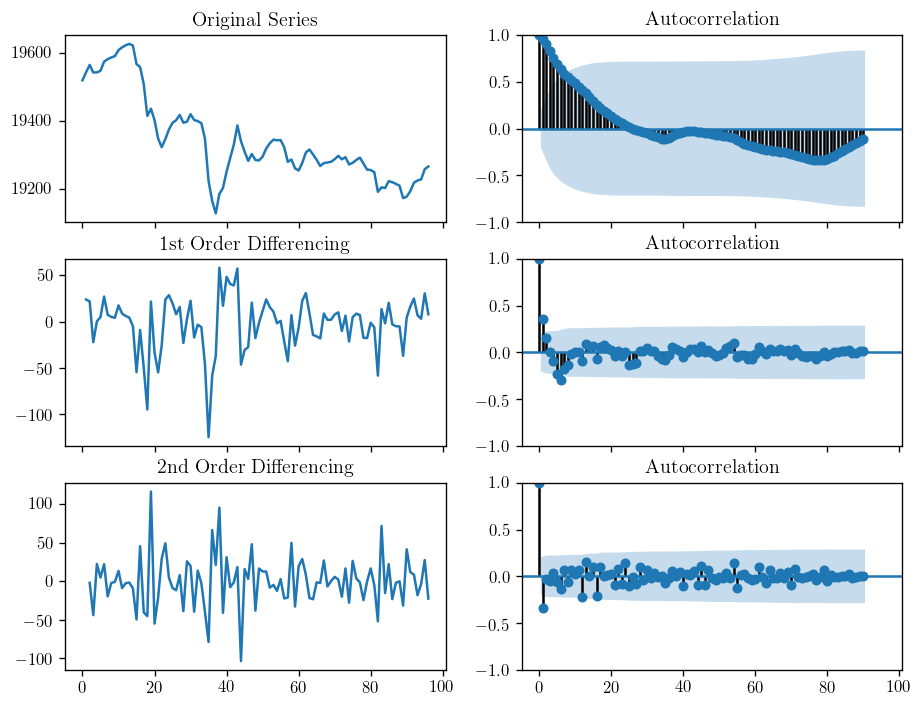

In [151]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('questdb-query-trades0.csv')

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Avg_price); axes[0, 0].set_title('Original Series')
plot_acf(df.Avg_price, ax=axes[0, 1], lags=90)

# 1st Differencing
axes[1, 0].plot(df.Avg_price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Avg_price.diff().dropna(), ax=axes[1, 1], lags=90)

# 2nd Differencing
axes[2, 0].plot(df.Avg_price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Avg_price.diff().diff().dropna(), ax=axes[2, 1], lags=90)

plt.savefig('autocorr.png')
plt.show()

__The autocorrelation function `(acf())` gives the self-correlation at all possible lags (past-periods). The autocorrelation at lag 0 is included by default which always takes the value 1 as it represents the correlation between the data and themselves.__

- As we can infer from the graph above, __the autocorrelation continues to decrease as the lag increases, confirming that there is no linear association between observations separated by larger lags.__

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot __for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.__

So, I am going to tentatively __fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).__

__Determine the number of differencing required to make the time series stationary__

In [7]:
from pmdarima.arima.utils import ndiffs

y = df.Avg_price

## Adf Test
ndiffs(y, test='adf')  # 1
print('ADF test =',ndiffs(y, test='adf'))
# KPSS test
ndiffs(y, test='kpss')  # 1
print('KPSS test =',ndiffs(y, test='kpss'))
# PP test:
ndiffs(y, test='pp')  # 1
print('PP test =',ndiffs(y, test='pp'))

ADF test = 1
KPSS test = 1
PP test = 1


## __Find the order of the AR Term (p)__

You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

__`pacf()` at lag k is autocorrelation function which describes the correlation between all data points that are exactly k steps apart- after accounting for their correlation with the data between those k steps.__ 

- __It helps to identify the number of autoregression (AR) coefficients (p term) in an ARIMA model.__


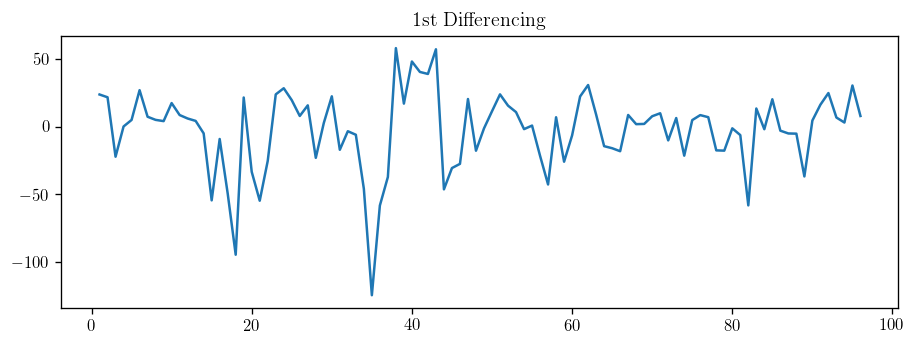

In [8]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 1, sharex=True)
axes.plot(df.Avg_price.diff()); axes.set_title('1st Differencing')
plt.show()

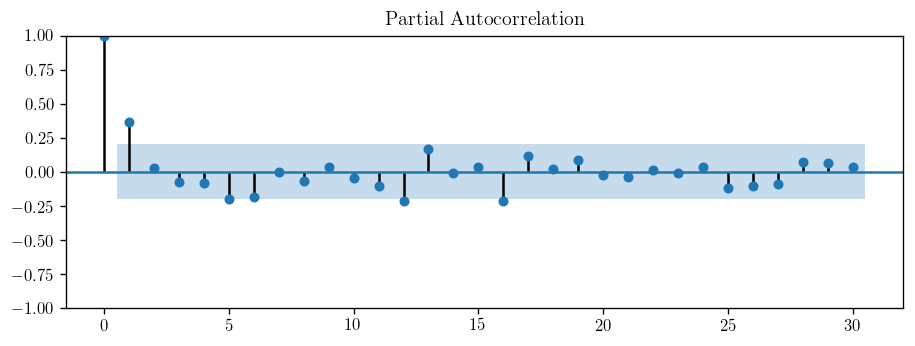

In [9]:
plot_pacf(df.Avg_price.diff().dropna(), lags=30);

The __PACF lag 1 is quite significant since is well above the significance line.__ However, __Lag 2 turns out to be not significant__ (not slightly managing to cross the significance limit; blue region). But I am going to be conservative and __tentatively fix the p as 1.__

## __Find the order of the MA term (q)__

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

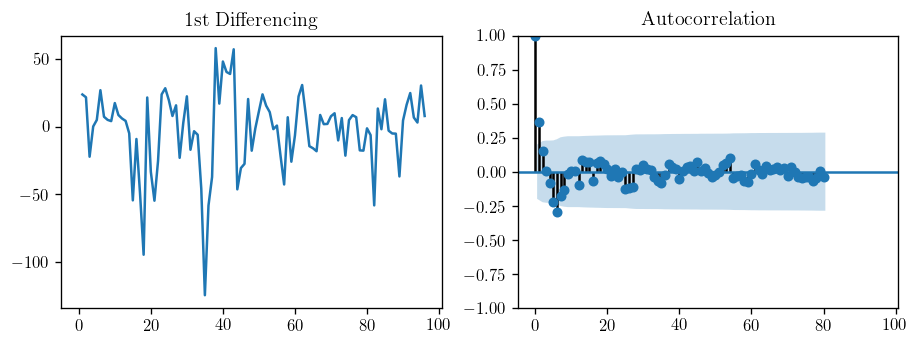

In [10]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Avg_price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Avg_price.diff().dropna(), ax=axes[1], lags=80)

plt.show()

__Couple of lags are well above the significance line. So, let’s tentatively fix q as 1__ (instead of 2 due to within significance line). When in doubt, go with the simpler model that sufficiently explains the Y.

## __Build the ARIMA Model__

__Iter 1: 1,1,2 ARIMA Model__

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Avg_price, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Avg_price   No. Observations:                   97
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -452.332
Date:                Mon, 31 Oct 2022   AIC                            912.665
Time:                        16:24:03   BIC                            922.922
Sample:                             0   HQIC                           916.811
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2484      0.368      0.676      0.499      -0.472       0.969
ma.L1          0.1103      0.397      0.278      0.781      -0.668       0.889
ma.L2          0.0963      0.153      0.631      0.5

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

Notice here the __coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05__ for the respective X to be significant.

__Iter 2: 1,1,1 ARIMA Model__

In [12]:
model = ARIMA(df.Avg_price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Avg_price   No. Observations:                   97
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -452.504
Date:                Mon, 31 Oct 2022   AIC                            911.009
Time:                        16:24:03   BIC                            918.702
Sample:                             0   HQIC                           914.118
                                 - 97                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4271      0.223      1.914      0.056      -0.010       0.864
ma.L1         -0.0648      0.271     -0.239      0.811      -0.597       0.467
sigma2       728.1480     75.698      9.619      0.0

__The model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (but should be << 0.05).__

__Plot the residuals to ensure there are no patterns,  (that is, look for constant mean and variance).__

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


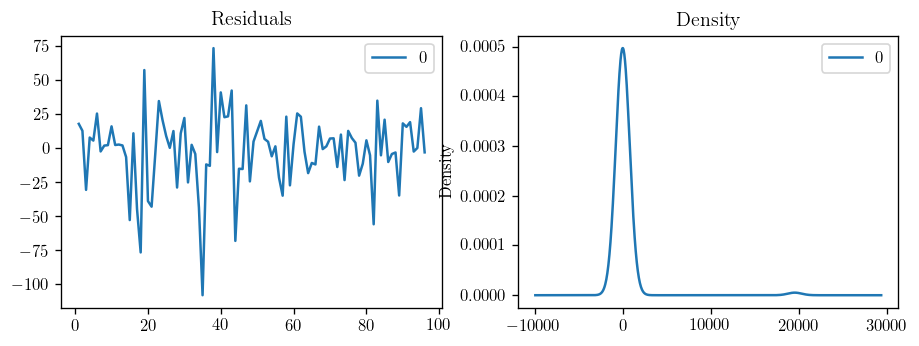

In [13]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals[1:].plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

__Let’s plot the actuals against the fitted values using plot_predict().__

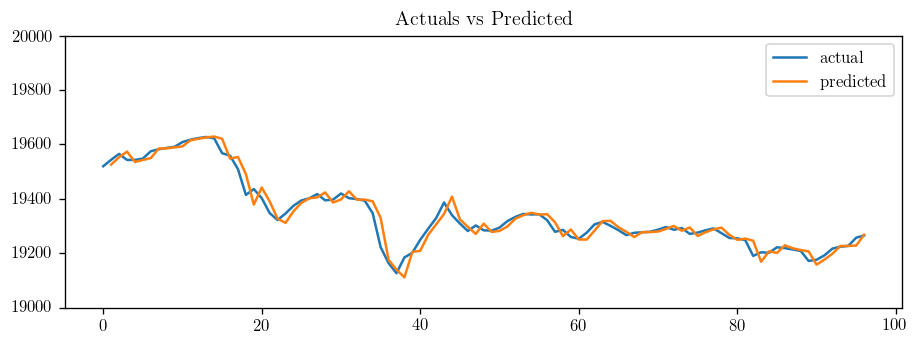

In [139]:
# Actual vs Fitted Plot
actual = df.Avg_price
predicted = model_fit.predict()
pd.DataFrame({'actual':actual, 'predicted':predicted[1:]}).plot(title='Actuals vs Predicted');
plt.ylim(19000,20000)
plt.savefig('first_pred_fit.png')

When you set `dynamic=False` the in-sample lagged values are used for prediction.

## __How to optimize ARIMA model manually using Out-of-Time Cross validation__

Take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

First, create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio

In [15]:
df.shape

(97, 3)

In [125]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
## 75:25 ratio ##
train = df.Avg_price[:73]
test = df.Avg_price[73:]

## 70:30 ratio ##
# train = df.Avg_price[:68]
# test = df.Avg_price[68:]

## 80:20 ratio ##
# train = df.Avg_price[:77]
# test = df.Avg_price[77:]

## 85:15 ratio ##
# train = df.Avg_price[:82]
# test = df.Avg_price[82:]

## 65:35 ratio ##
# train = df.Avg_price[:63]
# test = df.Avg_price[63:]

print(train.shape, test.shape)

(73,) (24,)


### Training model

Build the ARIMA model on training dataset, forecast and plot it.

                               SARIMAX Results                                
Dep. Variable:              Avg_price   No. Observations:                   73
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -344.443
Date:                Mon, 31 Oct 2022   AIC                            694.886
Time:                        21:13:41   BIC                            701.716
Sample:                             0   HQIC                           697.605
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.239      1.810      0.070      -0.036       0.901
ma.L1         -0.0304      0.290     -0.105      0.916      -0.599       0.539
sigma2       838.0020    103.917      8.064      0.0

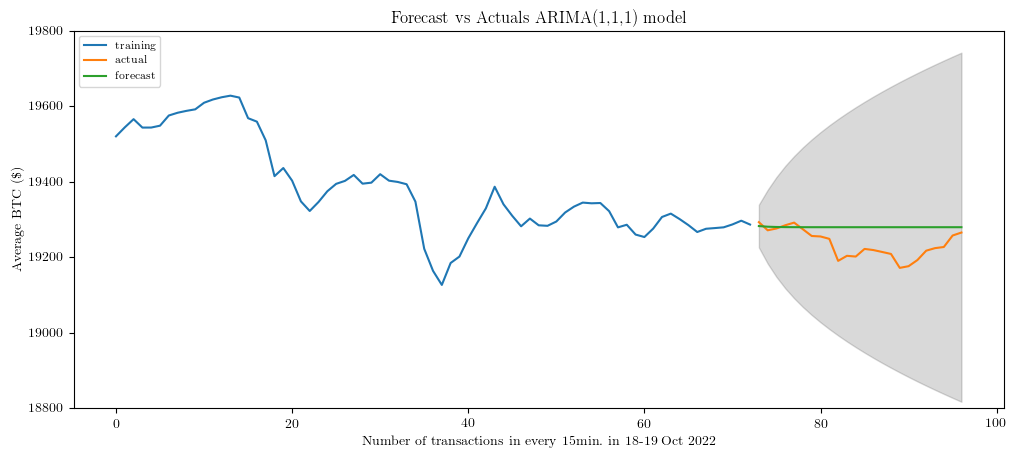

In [166]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model_1 = ARIMA(train, order=(1, 1, 1)) 
fitted_1 = model_1.fit()  
print(fitted_1.summary())

# Forecast
n_period= 0*(4)  # 4 quarter: Forecast for the next 1 hour (4*15 min).
n_steps = test.shape[0] + n_period
fc_1 = fitted_1.forecast(n_steps, alpha=0.05)  # 95% conf

# get forecast with updated
forecast = fitted_1.get_forecast(n_steps)

# Mean forecast
yhat = forecast.predicted_mean

# Confidence intervals of forecasts
conf = forecast.conf_int(alpha=0.05)

# Make as pandas series
fc_1_series_1 = pd.Series(fc_1, index=fc_1.index)  # test + extended fit_curve
lower_series_1 = pd.Series(conf.loc[:, 'lower Avg_price'], index=fc_1.index)
upper_series_1 = pd.Series(conf.loc[:, 'upper Avg_price'], index=fc_1.index)

# fc_1_series_1 = pd.Series(fc_1, index=test.index)  
# lower_series_1 = pd.Series(conf.loc[:, 'lower Avg_price'], index=test.index)
# upper_series_1 = pd.Series(conf.loc[:, 'upper Avg_price'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_1_series_1, label='forecast')
plt.xlabel('Number of transactions in every 15min. in 18-19 Oct 2022')
plt.ylabel('Average BTC ($\$$)')
plt.fill_between(lower_series_1.index, lower_series_1, upper_series_1, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals ARIMA(1,1,1) model')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(18800,19800)
plt.savefig('arima111.png')
plt.show()

From the chart, the ARIMA(1,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band.

But __if each of the predicted forecasts is consistently above the actuals. That means, by subtracting a small constant to our forecast, the accuracy should certainly improve.__ So, there is definitely scope for improvement.

So, what I am going to do is to increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

__Keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.__

                               SARIMAX Results                                
Dep. Variable:              Avg_price   No. Observations:                   73
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -345.464
Date:                Mon, 31 Oct 2022   AIC                            698.928
Time:                        21:14:34   BIC                            708.035
Sample:                             0   HQIC                           702.554
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9445      0.231      4.095      0.000       0.492       1.397
ma.L1         -0.6175      0.271     -2.278      0.023      -1.149      -0.086
ma.L2         -0.3400      0.103     -3.312      0.0

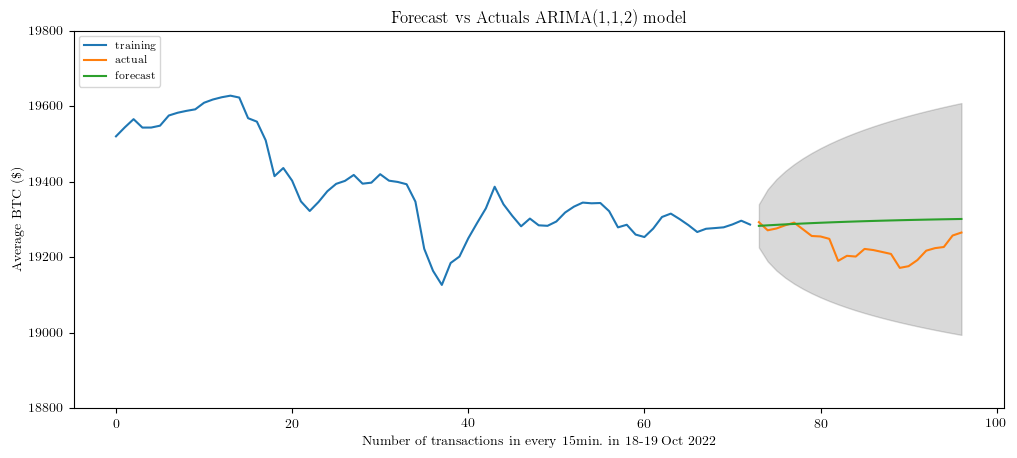

In [169]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model_2 = ARIMA(train, order=(1, 1, 2)) 
fitted_2 = model_2.fit()  
print(fitted_2.summary())

# Forecast
n_period= 0*(4)  # 4 quarter: Forecast for the next 1 hour (4*15 min).
n_steps = test.shape[0] + n_period
fc_2 = fitted_2.forecast(n_steps, alpha=0.05)  # 95% conf

# get forecast with updated
forecast = fitted_2.get_forecast(n_steps)

# Mean forecast
yhat = forecast.predicted_mean

# Confidence intervals of forecasts
conf = forecast.conf_int(alpha=0.05)

# Make as pandas series
fc_2_series_2 = pd.Series(fc_2, index=fc_2.index)  # test + extended fit_curve
lower_series_2 = pd.Series(conf.loc[:, 'lower Avg_price'], index=fc_2.index)
upper_series_2 = pd.Series(conf.loc[:, 'upper Avg_price'], index=fc_2.index)

# fc_2_series_2 = pd.Series(fc_2, index=test.index)  
# lower_series_2 = pd.Series(conf.loc[:, 'lower Avg_price'], index=test.index)
# upper_series_2 = pd.Series(conf.loc[:, 'upper Avg_price'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_2_series_2, label='forecast')
plt.xlabel('Number of transactions in every 15min. in 18-19 Oct 2022')
plt.ylabel('Average BTC ($\$$)')
plt.fill_between(lower_series_2.index, lower_series_2, upper_series_2, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals ARIMA(1,1,2) model')
plt.legend(loc='upper left', fontsize=8)
plt.ylim(18800,19800)
plt.savefig('arima112.png')
plt.show()

__The AIC has reduced to 694 from 698 which is not Good. But The P-values of the X terms are less the < 0.05, which is great (and this confidence interval is narrower).
So overall it’s much better.__

- __Prob(Q) = the p-value associated with the null hypothesis that the residuals have no correlation structure.__ 


- __Prob(JB) = the p-value associated with the null hypothesis that the residuals are Gaussian normally distributed. If either of the p-values is less than 0.05 we reject that hypothesis.__


- __Heteroskedasticity = volatility (fluctuation/S.D.) changing over time__

## __Accuracy Metrics for Time Series Forecast__

    Mean Absolute Percentage Error (MAPE)
    Mean Error (ME)
    Mean Absolute Error (MAE)
    Mean Percentage Error (MPE)
    Root Mean Squared Error (RMSE)
    Lag 1 Autocorrelation of Error (ACF1)
    Correlation between the Actual and the Forecast (corr)
    Min-Max Error (minmax)

In [170]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc_1[:len(test.values)], test.values)

{'mape': 0.002442895199444343,
 'me': 44.653906301360166,
 'mae': 46.92756047517696,
 'mpe': 0.0023250318398459154,
 'rmse': 57.28552920672302,
 'acf1': 0.816799159192606,
 'corr': 0.47268367299698133,
 'minmax': 0.0024340603405205163}

In [171]:
forecast_accuracy(fc_2[:len(test.values)], test.values)

{'mape': 0.0031270953364251775,
 'me': 58.9716798833559,
 'mae': 60.0774144958682,
 'mpe': 0.0030697804871510008,
 'rmse': 71.23763909016913,
 'acf1': 0.816799159192606,
 'corr': -0.6561203399743827,
 'minmax': 0.003113411839684055}

Typically, __if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.__

Why not use the other metrics?

Because __only the above three are percentage errors that vary between 0 and 1.__ That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.

## __How to do Auto Arima Forecast in Python__

In [129]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('questdb-query-trades0.csv')
train = df.Avg_price[:73]

model_auto = pm.auto_arima(df.Avg_price, start_p=1, start_q=1, start_d=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      max_d=3,          # maximum d
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# model_auto.model
model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=912.680, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=922.607, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=910.740, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=913.192, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=921.411, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=912.651, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=914.459, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=909.091, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=910.972, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=911.009, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=911.727, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=912.777, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.876 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   97
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -452.546
Date:                Mon, 31 Oct 2022   AIC                            909.091
Time:                        17:28:09   BIC                            914.220
Sample:                             0   HQIC                           911.164
                                 - 97                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3709      0.070      5.290      0.000       0.233       0.508
sigma2       728.7066     71.826     10.145      0.000     587.930     869.484
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                33.21
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.84
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

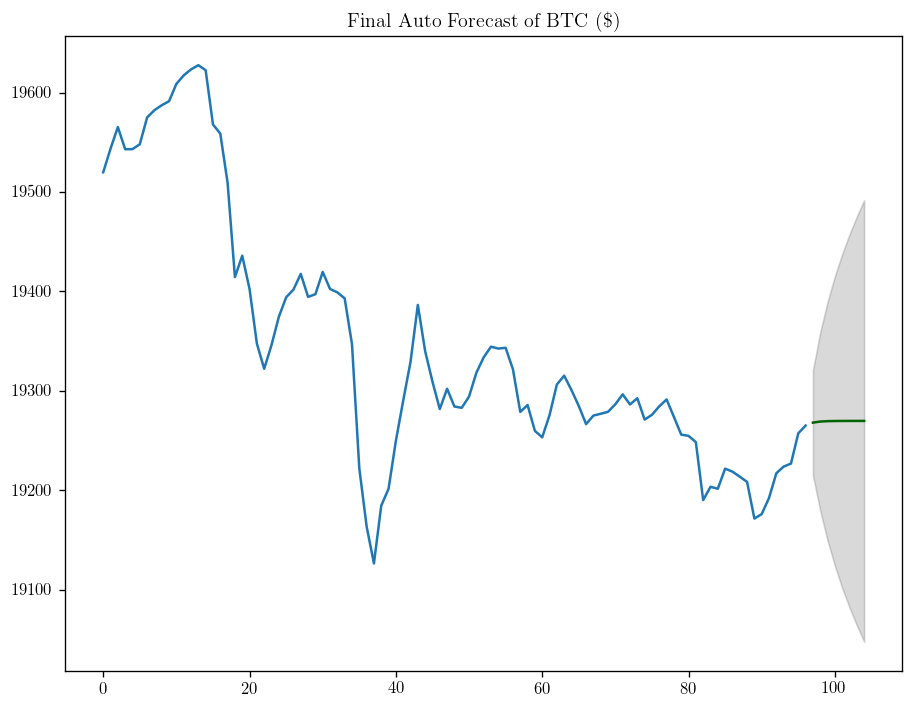

In [176]:
# Forecast
n_periods = 2*(4) #  Forecast for the next 24 hour(s) (4* 15 min).
fc, confint = model_auto.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = np.arange(len(train), len(train)+n_periods)
index_of_fc = np.arange(len(df.Avg_price), len(df.Avg_price)+n_periods)
# print(model.summary())

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df.Avg_price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Auto Forecast of BTC ($\$$)")
plt.show()

## __How to interpret the residual plots in ARIMA model__

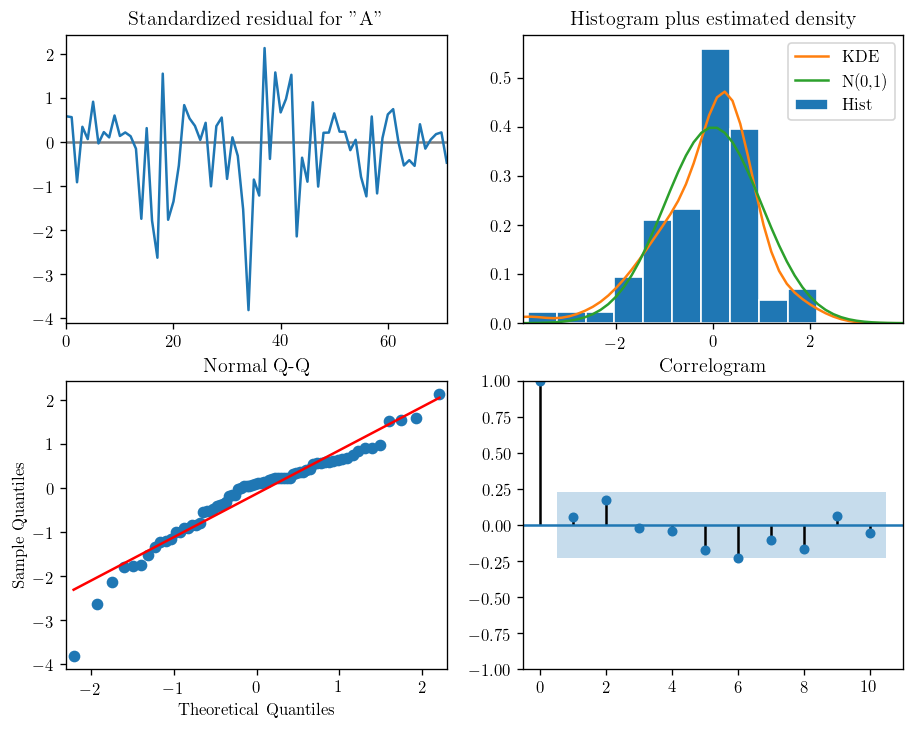

In [149]:
fitted.plot_diagnostics(figsize=(9,7))
# model.plot_diagnostics(figsize=(7,5))
plt.savefig('residual_diag.png')
plt.show()

__Top left:__ The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

__Top Right:__ The density plot suggest normal distribution with mean zero.

__Bottom left:__ All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

__Bottom Right:__ The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

## Volatility

### Observe volatility clustering

`Volatility clustering` refers to the observation that __"large changes tend to be followed by large changes, of either sign, and small changes tend to be followed by small changes."__

Volatility clustering is frequently observed in financial market data, and it poses a challenge for time series modeling.

with daily price dataset we calculate daily returns as the percentage price changes, plot the results and observe its behavior over time.

In [26]:
# Compute Log return 
df['Log return_avg_price'] = np.log(df['Avg_price']).diff()
# df['Log return_avg_price'] = np.log(df['Avg_price']/df['Avg_price'].shift())
df.dropna()

,timestamp,Avg_price,sum_amount,Log return_avg_price
1,2022-10-18T10:15:00.000000Z,19543.738648,90.480909,0.001218
2,2022-10-18T10:30:00.000000Z,19565.463332,178.453168,0.001111
3,2022-10-18T10:45:00.000000Z,19543.161582,95.919114,-0.001141
4,2022-10-18T11:00:00.000000Z,19543.252223,210.784091,0.000005
5,2022-10-18T11:15:00.000000Z,19548.183117,158.887689,0.000252
...,...,...,...,...
92,2022-10-19T09:00:00.000000Z,19217.078820,168.296196,0.001294
93,2022-10-19T09:15:00.000000Z,19223.802658,123.669769,0.000350
94,2022-10-19T09:30:00.000000Z,19226.817528,137.913344,0.000157
95,2022-10-19T09:45:00.000000Z,19257.260303,233.508153,0.001582


### Calculate volatility

We compute and convert volatility of price returns in Python.

Firstly, we compute the daily volatility as the standard deviation of price returns. Then convert the daily volatility to monthly and annual volatility.

In [27]:
# Calculate daily std of average BTC price
volatility_daily = df['Avg_price'].std()            # volatility_daily = df['Log return_avg_price'].std()
print(f'Daily volatility: {round(volatility_daily/100,3)}%')

# Convert daily volatility to monthly volatility
volatility_monthly = np.sqrt(21) * volatility_daily
print(f'\nMonthly volatility: {round(volatility_monthly/100,2)}%')

# Convert daily volatility to annual volatility
volatility_annual = np.sqrt(252) * volatility_daily
print(f'\nAnnual volatility: {round(volatility_annual/100,2)}%')

Daily volatility: 1.283%

Monthly volatility: 5.88%

Annual volatility: 20.36%


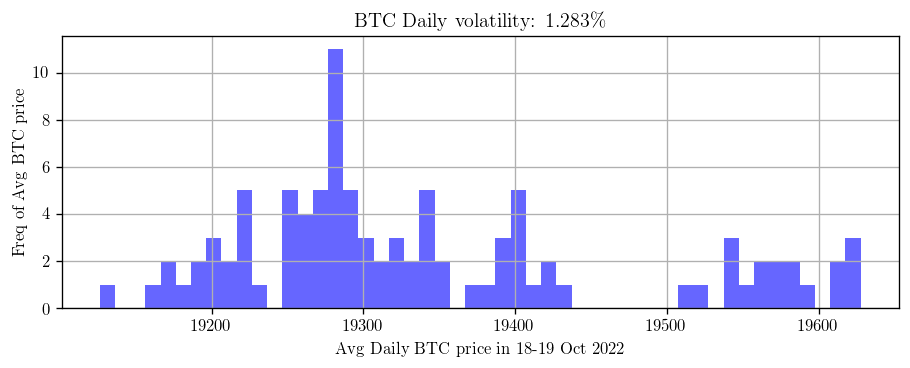

In [150]:
# Daily volatility
volatility_daily = df['Avg_price'].std()

str_vol = str(round(volatility_daily/100, 3))
fig, ax = plt.subplots()
df['Avg_price'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Avg Daily BTC price in 18-19 Oct 2022')
ax.set_ylabel('Freq of Avg BTC price')
ax.set_title('BTC Daily volatility: ' + str_vol + '$\%$')
plt.savefig('daily_volatility_btc.png')

### Rolling volatility

Considering that, the rolling volatility is calculated across 2 days using standard deviation:

- __30 Day Rolling Volatility = Standard Deviation of the last 30 percentage changes in Total Return Price.__

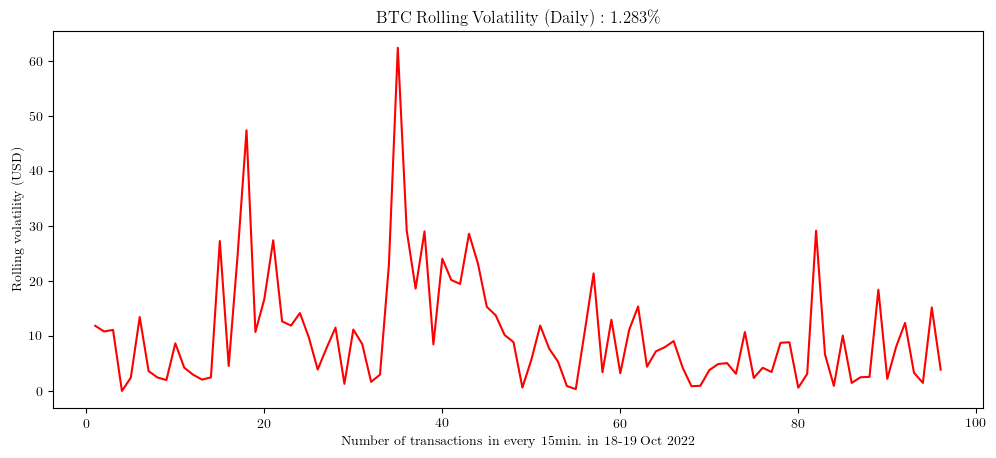

In [189]:
# Rolling Volatility 
var = 2  # period = 2 days
rollist = df.Avg_price.rolling(var)
rolvol  = rollist.std(ddof=0) # rollling volatility (USD unit)        #/100 : rolling volataility in percentage

plt.figure(figsize=(12,5), dpi=100)
plt.plot(rolvol,c='r') 
plt.xlabel('Number of transactions in every 15min. in 18-19 Oct 2022')
plt.ylabel('Rolling volatility (USD)')
plt.title('BTC Rolling Volatility (Daily) :\ ' + str_vol + '$\%$') 
plt.savefig('roll_volatility.png')
plt.show() 

## Final forecast + volatility

<Figure size 1200x500 with 0 Axes>

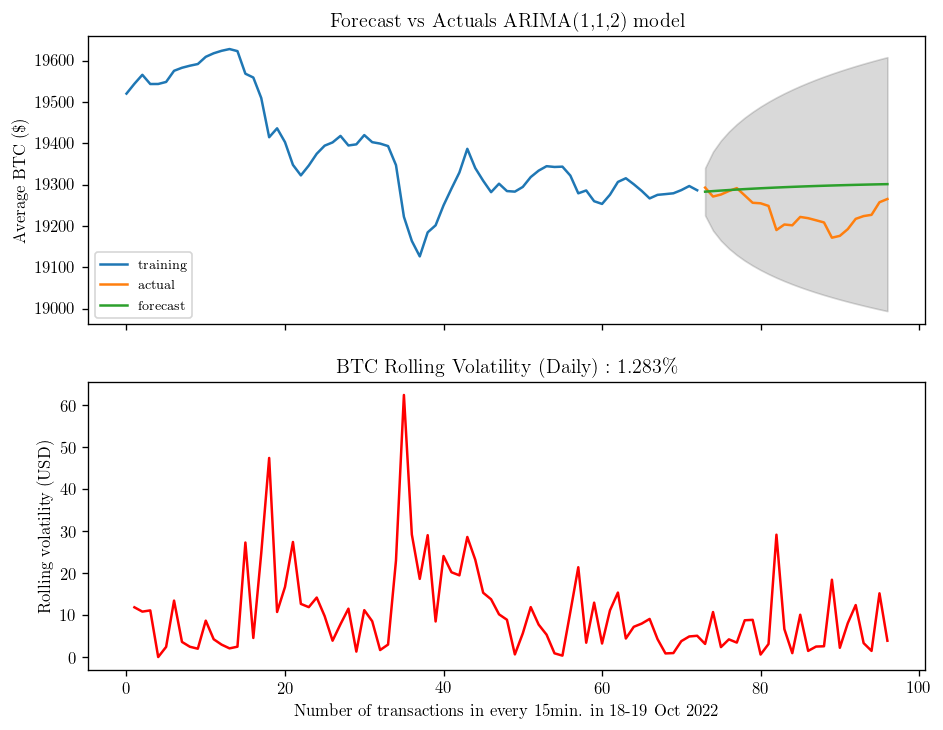

In [206]:
# Plot1: Time Forecast Arima model 112
plt.figure(figsize=(12,5), dpi=100)
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(train, label='training')
ax1.plot(test, label='actual')
ax1.plot(fc_2_series_2, label='forecast')
ax1.set_ylabel('Average BTC ($\$$)')
ax1.fill_between(lower_series_2.index, lower_series_2, upper_series_2, 
                 color='k', alpha=.15)
ax1.set_title('Forecast vs Actuals ARIMA(1,1,2) model')
ax1.legend(loc='lower left', fontsize=8)

# Plot2: Rolling Volatility of BTC
ax2.plot(rolvol,c='r') 
ax2.set_xlabel('Number of transactions in every 15min. in 18-19 Oct 2022')
ax2.set_ylabel('Rolling volatility (USD)')
ax2.set_title('BTC Rolling Volatility (Daily) :\ ' + str_vol + '$\%$') 

plt.savefig('arima112_rolvol.png')
plt.show()

***

***

__Misc: Rolling operation Example__

In [15]:
df.Avg_price.head(),\
df.Avg_price.head().rolling,\
df.Avg_price.head().rolling(2)

(0    19519.955594
 1    19543.738648
 2    19565.463332
 3    19543.161582
 4    19543.252223
 Name: Avg_price, dtype: float64,
 <bound method NDFrame.rolling of 0    19519.955594
 1    19543.738648
 2    19565.463332
 3    19543.161582
 4    19543.252223
 Name: Avg_price, dtype: float64>,
 Rolling [window=2,center=False,axis=0,method=single])

- __rolling(2) means taking each element in array into 2 element windows for operating in math e.g. sum, mean, std etc.__


     - ex: `rolling(2).sum() = [ (array[0] + array[1]), (array[1] +         array[2]), ... ]`

In [21]:
df.Avg_price.rolling(2).sum()

0              NaN
1     39063.694243
2     39109.201981
3     39108.624914
4     39086.413805
          ...     
92    38409.302127
93    38440.881478
94    38450.620186
95    38484.077831
96    38522.380731
Name: Avg_price, Length: 97, dtype: float64

In [25]:
df.Avg_price.values[0] + df.Avg_price.values[1],\
df.Avg_price.values[1] + df.Avg_price.values[2]

(39063.69424267259, 39109.201980584)

***